In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Plots per step

,epoch,batch,loss,mae,mse,energy_loss
0,1,1,0.006994,0.027667,0.006994,1.172927
1,1,2,0.003829,0.025858,0.005411,0.941033
2,1,3,0.005678,0.026355,0.005500,0.853370
3,1,4,0.004212,0.026095,0.005178,0.917959
4,1,5,0.005534,0.026747,0.005249,1.291685


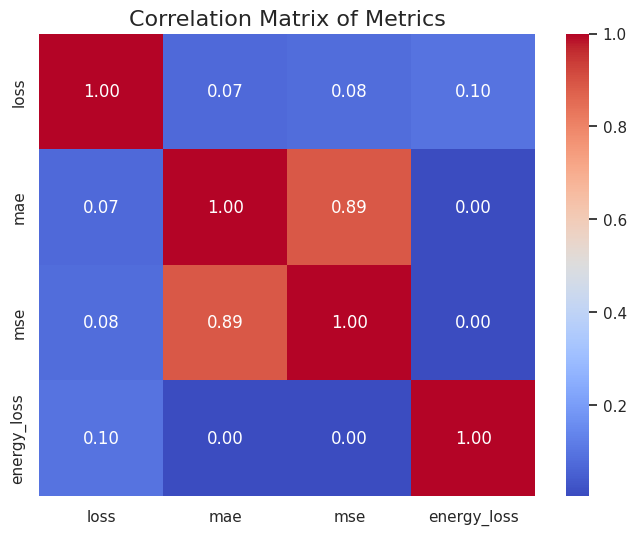

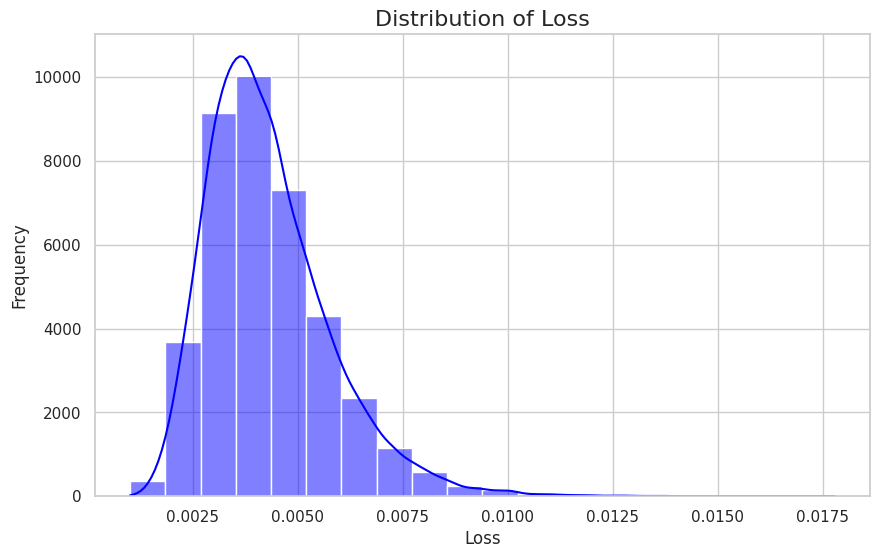

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.001/batch_train_log_lambda_0.5_datafrac_0.001.csv"
# filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.1/batch_train_log_lambda_0.0_datafrac_0.1.csv"
filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.1/batch_val_log_lambda_0.0_datafrac_0.1.csv"
filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.1/batch_val_log_lambda_0.5_datafrac_0.1.csv"

data = pd.read_csv(filepath)

# Check the first few rows of the dataset
display(data.head())

# Set the style for the plots
sns.set(style="whitegrid")


# Heatmap to visualize the correlation between variables
plt.figure(figsize=(8, 6))
correlation_matrix = data[["loss", "mae", "mse", "energy_loss"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Metrics", fontsize=16)
plt.show()

# Histogram of Loss values
plt.figure(figsize=(10, 6))
sns.histplot(data["loss"], kde=True, color="blue", bins=20)
plt.title("Distribution of Loss", fontsize=16)
plt.xlabel("Loss", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


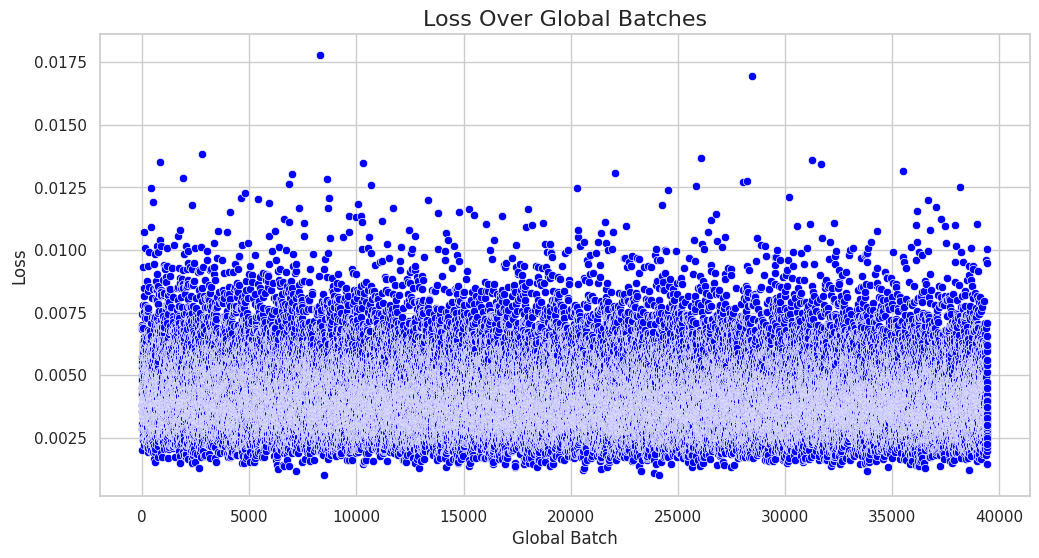

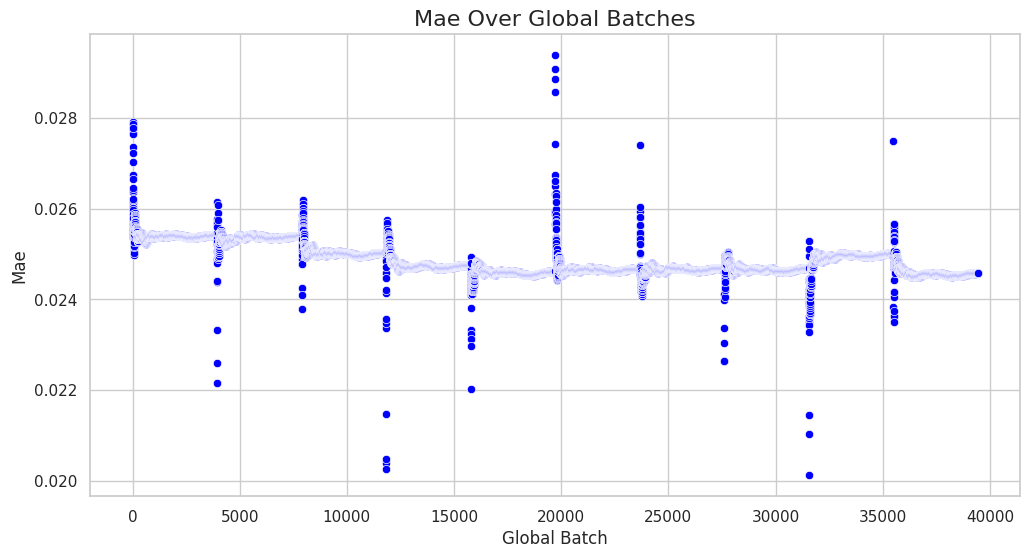

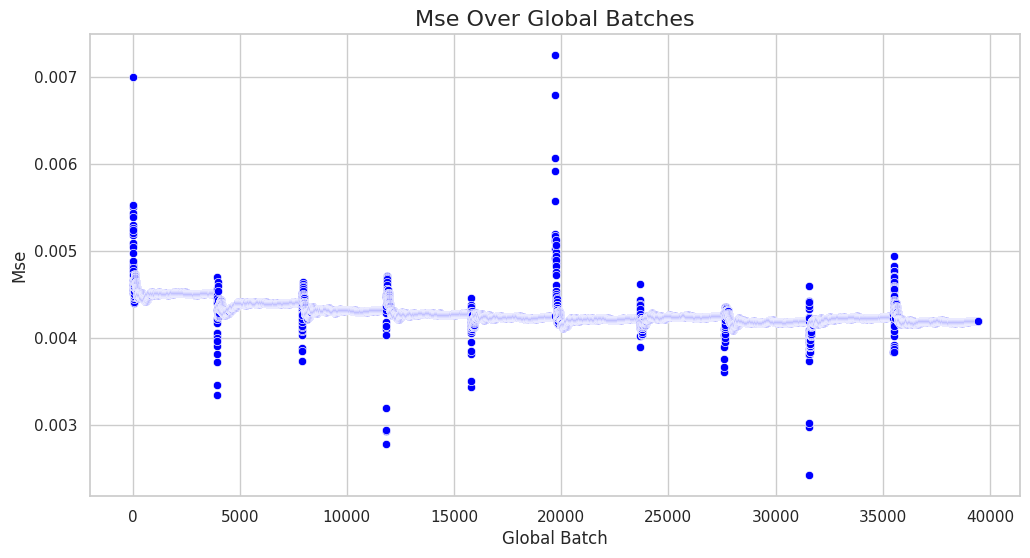

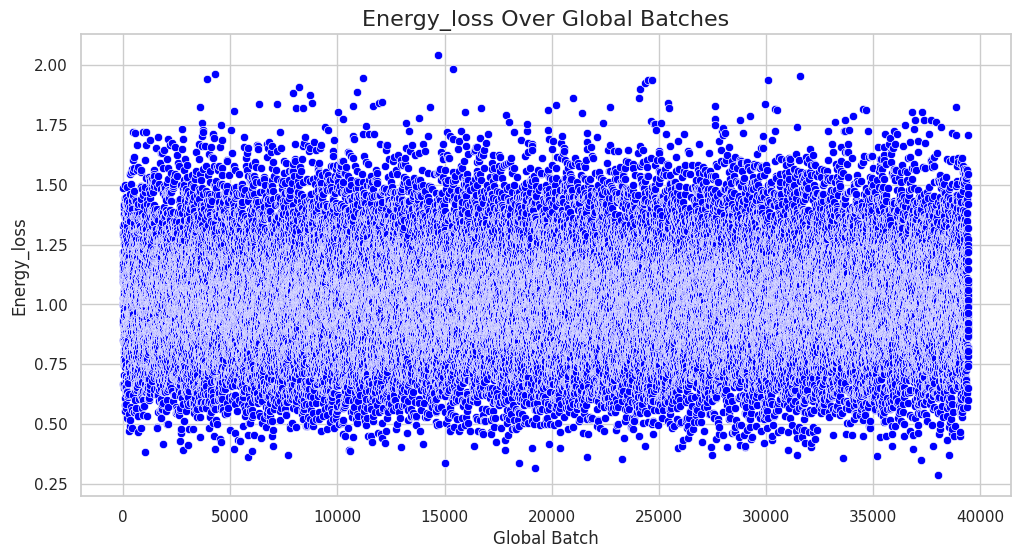

In [6]:
# Create a global batch index
data['global_batch'] = (data['epoch'] - 1) * data['batch'].max() + data['batch']

# Plot metrics against the global batch index
metrics = ['loss', 'mae', 'mse', 'energy_loss']
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x="global_batch", y=metric, data=data, marker="o", color="blue")
    plt.title(f"{metric.capitalize()} Over Global Batches", fontsize=16)
    plt.xlabel("Global Batch", fontsize=12)
    plt.ylabel(metric.capitalize(), fontsize=12)
    plt.show()


# lambda 0.5

,epoch,batch,loss,mae,mse,energy_loss
0,1,1,0.515111,0.025271,0.003751,1.022720
1,1,2,0.276870,0.025816,0.004885,0.541703
2,1,3,0.484601,0.025713,0.004509,0.961683
3,1,4,0.520515,0.024348,0.004097,1.035312
4,1,5,0.744316,0.025587,0.004380,1.477603


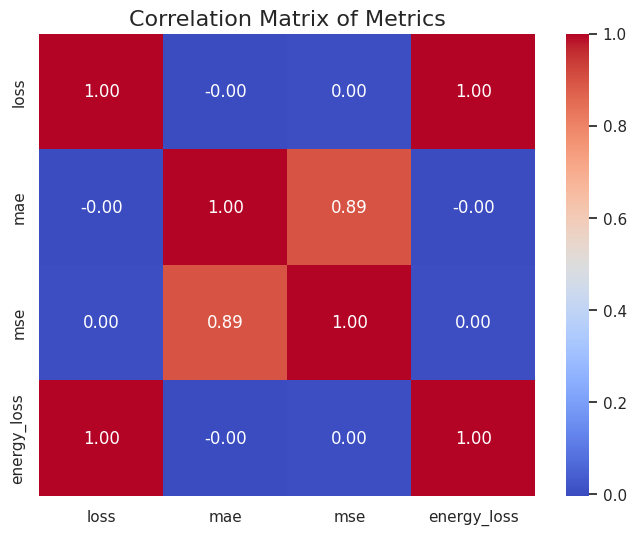

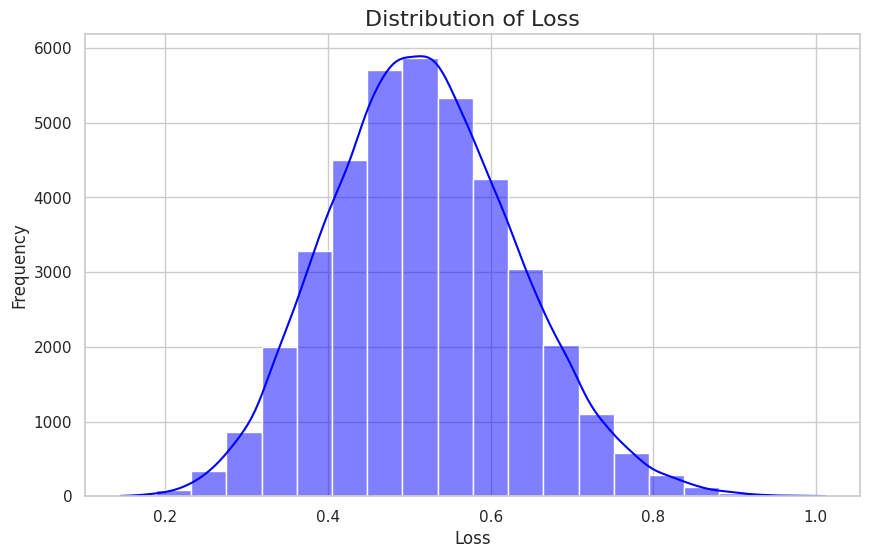

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.001/batch_train_log_lambda_0.5_datafrac_0.001.csv"
# filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.1/batch_train_log_lambda_0.0_datafrac_0.1.csv"
filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.1/batch_val_log_lambda_0.0_datafrac_0.1.csv"
filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.1/batch_val_log_lambda_0.5_datafrac_0.1.csv"

data = pd.read_csv(filepath)

# Check the first few rows of the dataset
display(data.head())

# Set the style for the plots
sns.set(style="whitegrid")


# Heatmap to visualize the correlation between variables
plt.figure(figsize=(8, 6))
correlation_matrix = data[["loss", "mae", "mse", "energy_loss"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Metrics", fontsize=16)
plt.show()

# Histogram of Loss values
plt.figure(figsize=(10, 6))
sns.histplot(data["loss"], kde=True, color="blue", bins=20)
plt.title("Distribution of Loss", fontsize=16)
plt.xlabel("Loss", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


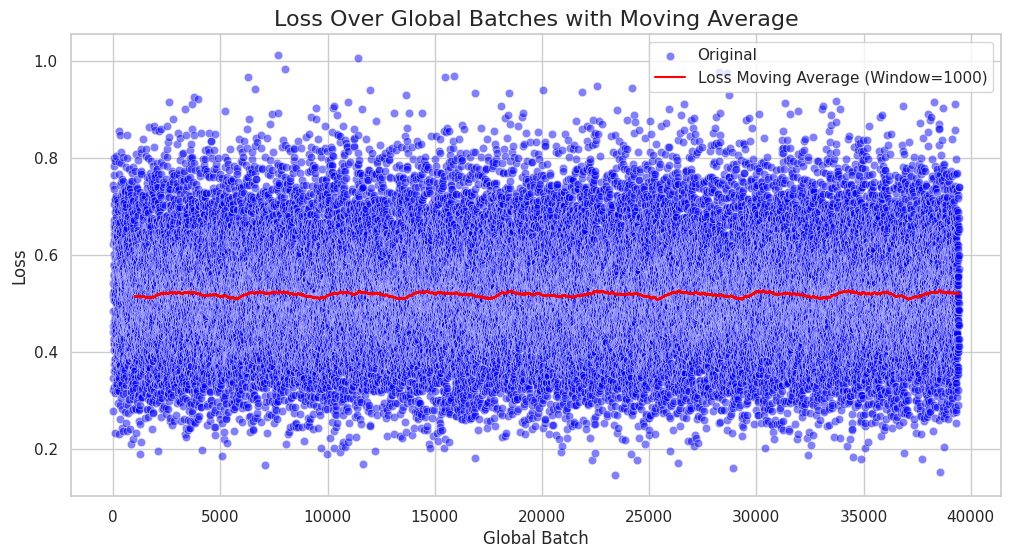

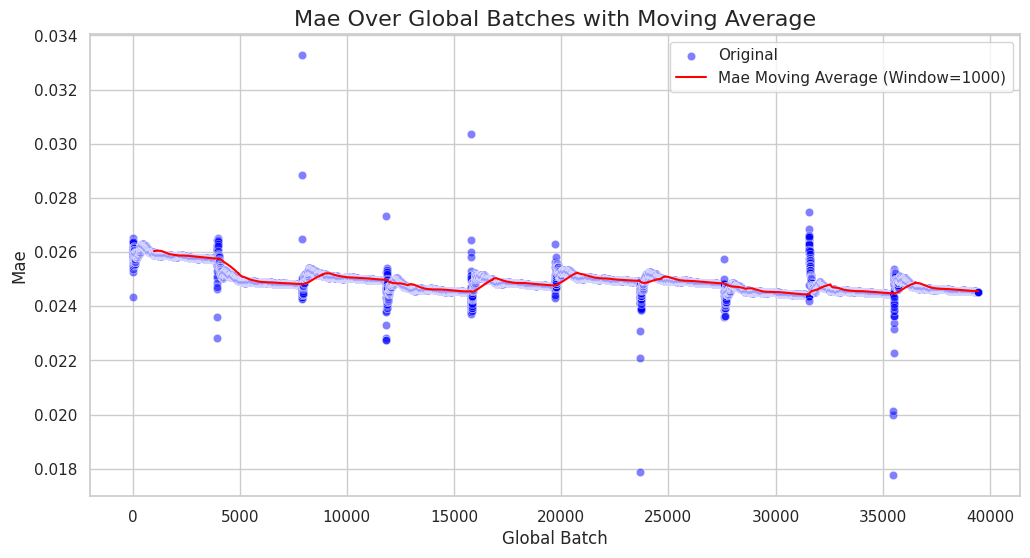

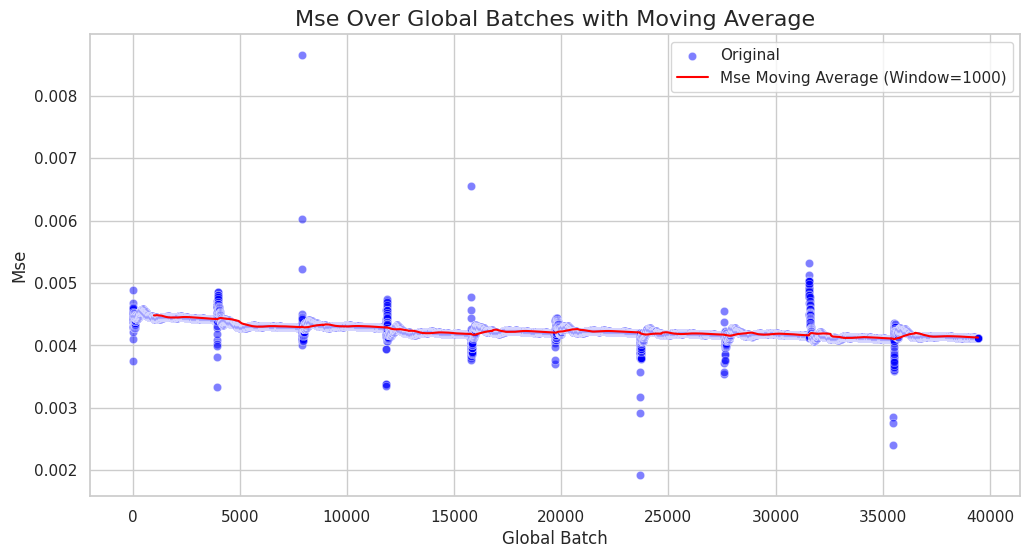

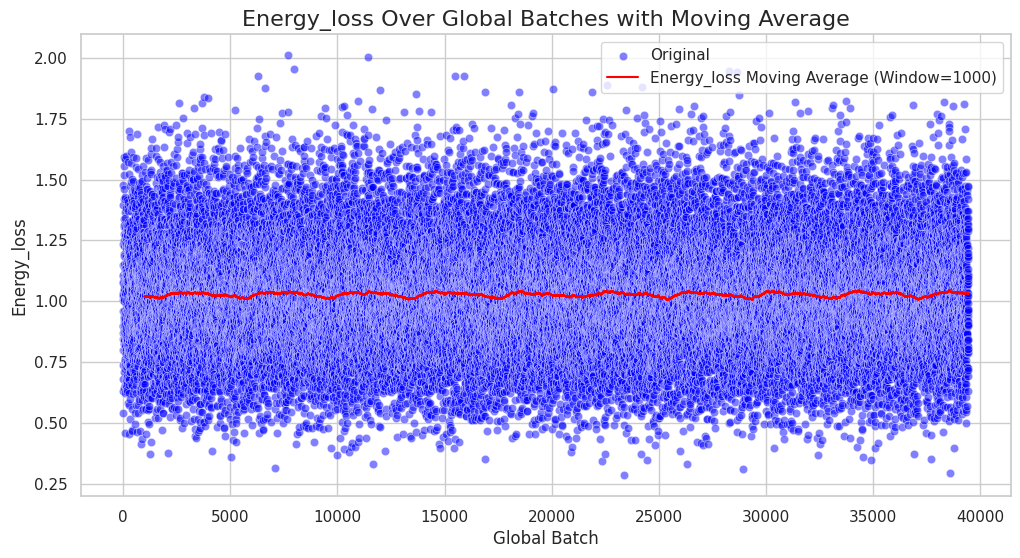

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `data` is a pandas DataFrame with 'epoch', 'batch', and the metrics columns like 'loss', 'mae', 'mse', 'energy_loss'

# Create a global batch index
data['global_batch'] = (data['epoch'] - 1) * data['batch'].max() + data['batch']

# Define the metrics to plot
metrics = ['loss', 'mae', 'mse', 'energy_loss']
window_size = 1000  # Define the window size for the moving average

# Loop through each metric and plot with moving average
for metric in metrics:
    plt.figure(figsize=(12, 6))
    
    # Compute the moving average for the metric with the rolling window
    data[f'{metric}_moving_avg'] = data[metric].rolling(window=window_size).mean()
    
    # Plot the original data (scatter)
    sns.scatterplot(x="global_batch", y=metric, data=data, marker="o", color="blue", alpha=0.5, label='Original')
    
    # Plot the moving average (line)
    sns.lineplot(x="global_batch", y=f'{metric}_moving_avg', data=data, color="red", label=f'{metric.capitalize()} Moving Average (Window={window_size})')

    # Add title and labels
    plt.title(f"{metric.capitalize()} Over Global Batches with Moving Average", fontsize=16)
    plt.xlabel("Global Batch", fontsize=12)
    plt.ylabel(metric.capitalize(), fontsize=12)
    plt.legend()
    
    # Show the plot
    plt.show()


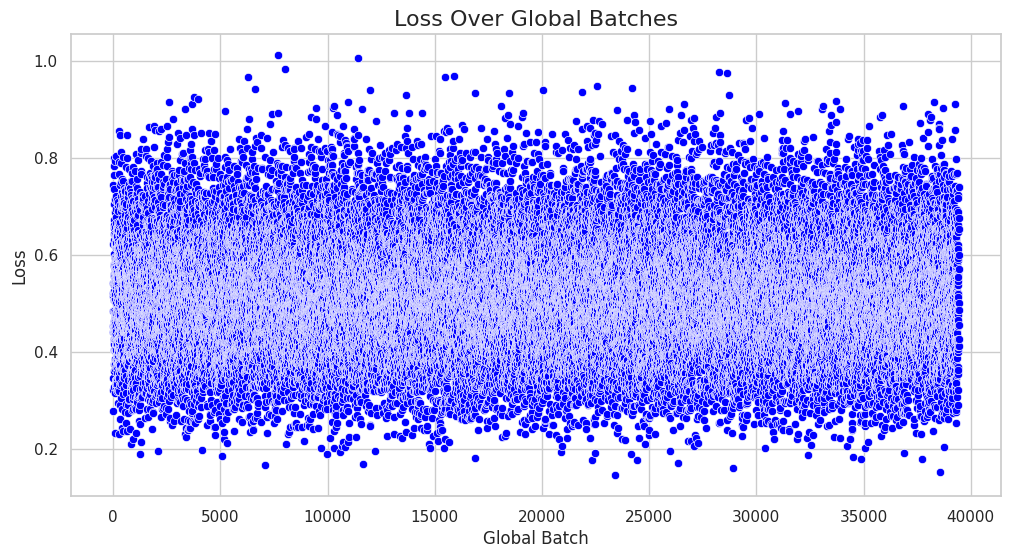

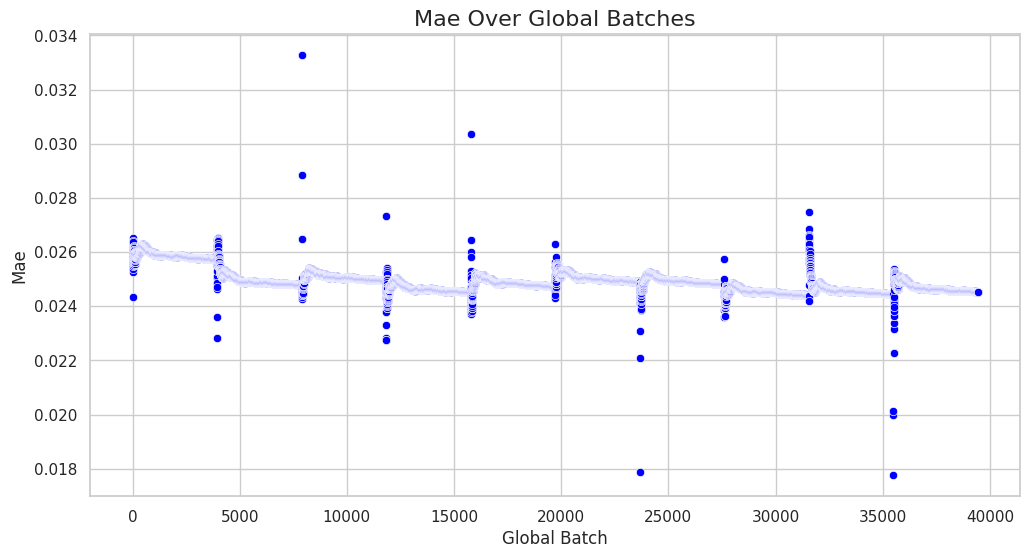

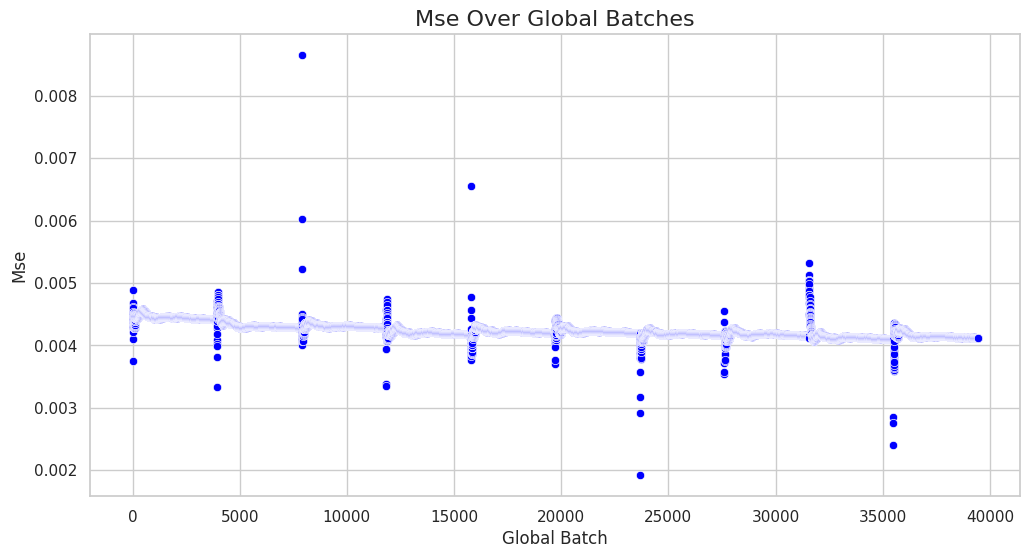

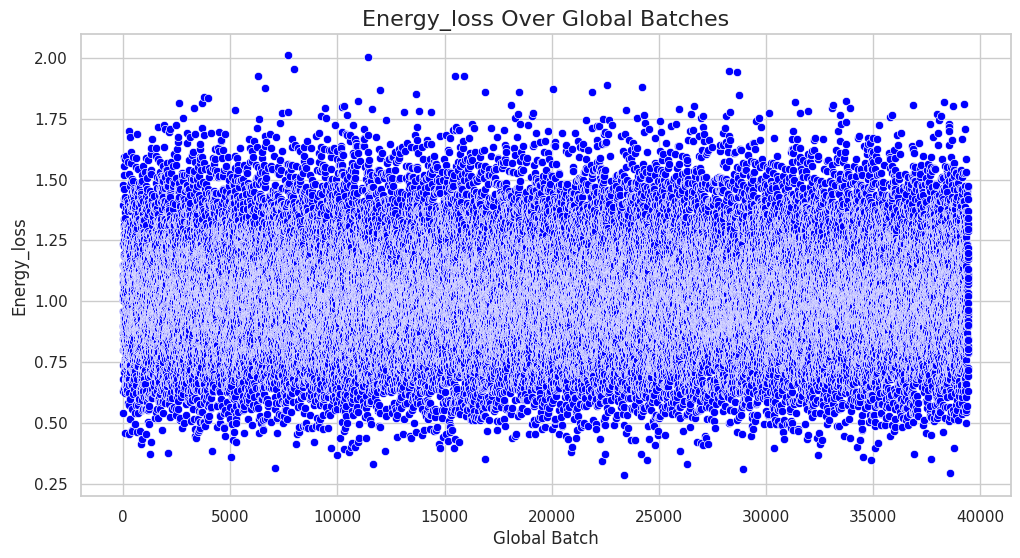

In [9]:
# Create a global batch index
data['global_batch'] = (data['epoch'] - 1) * data['batch'].max() + data['batch']

# Plot metrics against the global batch index
metrics = ['loss', 'mae', 'mse', 'energy_loss']
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x="global_batch", y=metric, data=data, marker="o", color="blue")
    plt.title(f"{metric.capitalize()} Over Global Batches", fontsize=16)
    plt.xlabel("Global Batch", fontsize=12)
    plt.ylabel(metric.capitalize(), fontsize=12)
    plt.show()


# Plot per epoch

In [ ]:

# Load the data
filepath_epoch = "/home/alvarovh/code/cse598_climate_proj/results/results_0.001/csv_logger_lambda_0.5_datafrac_0.001.csv"  # Replace with the correct file path

data = pd.read_csv(filepath_epoch)



In [16]:
data

,epoch,batch,loss,mae,mse,energy_loss
0,1,1,0.615634,0.088399,0.044790,1.141688
1,1,2,0.567621,0.086073,0.037061,1.076577
2,1,3,0.565845,0.086526,0.033765,1.077342
3,1,4,0.598838,0.087734,0.031752,1.146250
4,1,5,0.411701,0.085179,0.028175,0.795673
...,...,...,...,...,...,...
3545,10,351,0.485780,0.027502,0.004419,0.963284
3546,10,352,0.464871,0.027493,0.004416,0.922716
3547,10,353,0.563816,0.027499,0.004418,1.117458
3548,10,354,0.784425,0.027512,0.004422,1.557572


In [7]:
# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(data["epoch"], data["train_loss"], label="Training Loss")
plt.plot(data["epoch"], data["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation MAE
plt.figure(figsize=(10, 6))
plt.plot(data["epoch"], data["train_mae"], label="Training MAE")
plt.plot(data["epoch"], data["val_mae"], label="Validation MAE")
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Training and Validation MAE")
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation MSE
plt.figure(figsize=(10, 6))
plt.plot(data["epoch"], data["train_mse"], label="Training MSE")
plt.plot(data["epoch"], data["val_mse"], label="Validation MSE")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training and Validation MSE")
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation energy losses
plt.figure(figsize=(10, 6))
plt.plot(data["epoch"], data["train_energy_loss"], label="Training Energy Loss")
plt.plot(data["epoch"], data["val_energy_loss"], label="Validation Energy Loss")
plt.xlabel("Epoch")
plt.ylabel("Energy Loss")
plt.title("Training and Validation Energy Loss")
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'train_loss'

<Figure size 1000x600 with 0 Axes>